## Importing Libraries

In [95]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as st

## Importing Data

### Setup Working Directory [Discarded]

In [96]:
# #read the path
# file_path = ""

### Filtering Parquet Files from WD

In [97]:
#select parquet files only
par_files = glob.glob('nyc_green_taxi_parquet_format/*.{}'.format('parquet'))

In [98]:
# trips = pd.read_parquet('nyc_green_taxi_parquet_format/green_tripdata_2018-01.parquet', engine='pyarrow')
trips = pd.concat([pd.read_parquet(f,engine='pyarrow') for f in par_files ], ignore_index=True)
locations = pd.read_csv('taxi_zone.csv')

## Export CSV [DISABLED]

In [99]:
#trips.to_csv('greeen_trip_2018_consolidated.csv')

## Data Verification using basic Analysis

In [100]:
trips.shape

(792744, 20)

In [112]:
trips.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [120]:
trips['ID'] = trips['index']
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792744 entries, 0 to 792743
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   level_0                792744 non-null  int64         
 1   index                  792744 non-null  int64         
 2   VendorID               792744 non-null  int64         
 3   lpep_pickup_datetime   792744 non-null  datetime64[ns]
 4   lpep_dropoff_datetime  792744 non-null  datetime64[ns]
 5   store_and_fwd_flag     792744 non-null  object        
 6   RatecodeID             792744 non-null  int64         
 7   PULocationID           792744 non-null  int64         
 8   DOLocationID           792744 non-null  int64         
 9   passenger_count        792744 non-null  int64         
 10  trip_distance          792744 non-null  float64       
 11  fare_amount            792744 non-null  float64       
 12  extra                  792744 non-null  floa

In [121]:
trips.isna().sum()

level_0                       0
index                         0
VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                792744
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     3
congestion_surcharge     792744
ID                            0
dtype: int64

In [101]:
trips.head(-1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.00,0.0,None,0.3,7.30,2,1.0,None
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.00,0.0,None,0.3,15.80,2,1.0,None
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.00,0.0,None,0.3,11.30,2,1.0,None
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.00,0.0,None,-0.3,-4.30,3,1.0,None
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.00,0.0,None,0.3,4.30,2,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792738,2,2018-01-31 23:34:07,2018-01-31 23:43:38,N,1,80,198,1,2.59,10.0,0.5,0.5,0.00,0.0,None,0.3,11.30,2,1.0,None
792739,2,2018-01-31 23:42:10,2018-01-31 23:43:24,N,1,120,243,1,0.51,3.5,0.5,0.5,0.00,0.0,None,0.3,4.80,2,1.0,None
792740,2,2018-02-01 00:00:48,2018-02-01 00:08:11,N,1,41,116,1,1.46,7.0,0.5,0.5,0.00,0.0,None,0.3,8.30,2,1.0,None
792741,2,2018-01-31 23:19:43,2018-01-31 23:23:41,N,1,41,42,1,1.04,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2,1.0,None


In [102]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792741.000000
mean,1.826307,1.074549,109.994698,128.606592,1.362838,2.665351,11.734082,0.339536,0.487984,1.035210,0.084959,0.293027,14.001791,1.475638,1.018217
std,0.378845,0.565258,74.422768,77.166692,1.047155,2.844045,10.163493,0.395044,0.083898,1.893419,1.020368,0.049675,11.086153,0.521874,0.133734
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,0.300000,2126.800000,5.000000,2.000000


In [103]:
trips.memory_usage()

Index                        128
VendorID                 6341952
lpep_pickup_datetime     6341952
lpep_dropoff_datetime    6341952
store_and_fwd_flag       6341952
RatecodeID               6341952
PULocationID             6341952
DOLocationID             6341952
passenger_count          6341952
trip_distance            6341952
fare_amount              6341952
extra                    6341952
mta_tax                  6341952
tip_amount               6341952
tolls_amount             6341952
ehail_fee                6341952
improvement_surcharge    6341952
total_amount             6341952
payment_type             6341952
trip_type                6341952
congestion_surcharge     6341952
dtype: int64

In [104]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792744.000000,792741.000000
mean,1.826307,1.074549,109.994698,128.606592,1.362838,2.665351,11.734082,0.339536,0.487984,1.035210,0.084959,0.293027,14.001791,1.475638,1.018217
std,0.378845,0.565258,74.422768,77.166692,1.047155,2.844045,10.163493,0.395044,0.083898,1.893419,1.020368,0.049675,11.086153,0.521874,0.133734
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,0.300000,2126.800000,5.000000,2.000000


In [105]:
trips['VendorID'].value_counts()

2    655050
1    137694
Name: VendorID, dtype: int64

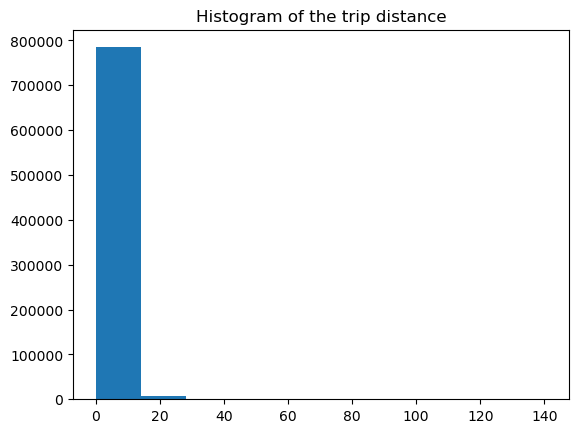

In [106]:
plt.hist(trips["trip_distance"])
plt.title('Histogram of the trip distance')
plt.show()

/Users/pareekkarishamagmail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

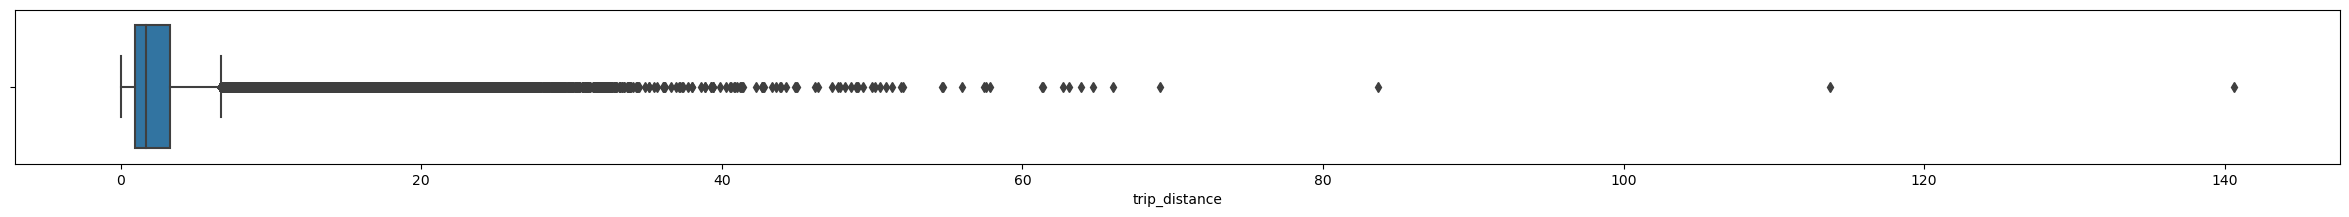

In [107]:
plt.figure(figsize=[30,2])
sns.boxplot(trips['trip_distance'])

In [108]:
print(f"There are {trips[trips['trip_distance']==0].shape[0]} records with Trip distance being zero.")

There are 9215 records with Trip distance being zero.


In [109]:
#Removing records in which trip distance is 0.
trip_Distance = trips.trip_distance[trips.trip_distance>0]
#Removing records in which trip distance is 3 standard deviations away from mean.

trip_Distance = trip_Distance[(trip_Distance-trip_Distance.median()).abs() < 4*trip_Distance.std()]

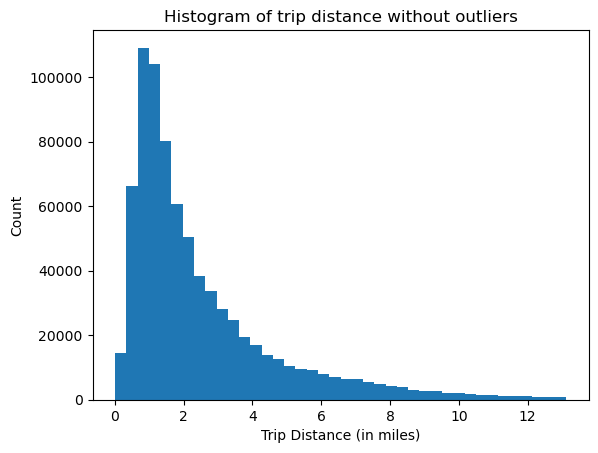

In [110]:
#Plotting histogram with 40 bins.
plt.hist(trip_Distance,bins = 40)
plt.title('Histogram of trip distance without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

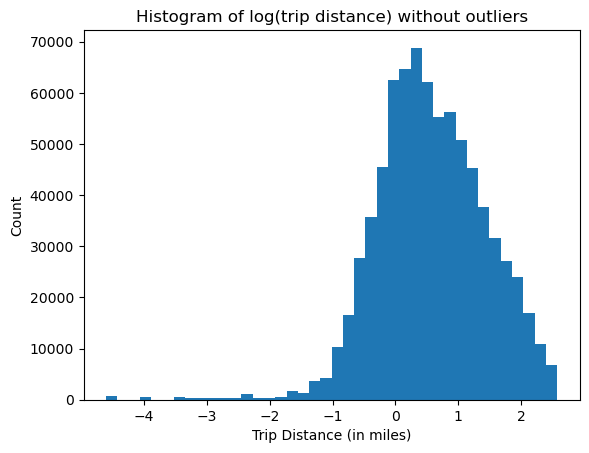

In [111]:
#Plotting histogram with 40 bins.
plt.hist(np.log(trip_Distance),bins = 40)
plt.title('Histogram of log(trip distance) without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()